<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table de matière</h1>





* [1. Libraries](#1)


* [2. Exploration des données](#2)


* [3. première approche de résolution](#3)



<a id='1'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Librairies</h1>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline 
import re


<a id='2'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Exploration des données</h1>

In [10]:
data=pd.read_json('../Data/datasetProjet2022.json')
data

,user_lang,tweet_coordinates_geojson,loc_point_geojson,doublon,country,tweet_source,tweet_current_user_retweet,user_location,tweet_coordinates_geom,user_geo_enabled,...,user_friends_count,tweet_coordinates,tweet_mtion,tweet_lang,id_filtre,tweet_favorite_count,user_listed_counted,tweet_id,place_bbox_geom,user_utc_offset
0,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,None,None,0.0,...,4997.0,None,None,fr,63,0.0,41.0,1154707909470801920,None,-1.0
1,None,None,NaN,False,None,"<a href=""http://twitter.com/download/android"" ...",-1.0,None,None,0.0,...,654.0,None,None,fr,63,0.0,0.0,1154708887871922177,None,-1.0
2,None,None,NaN,False,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",-1.0,France,None,0.0,...,321.0,None,HuetSylvestre ;,fr,63,0.0,0.0,1154709490442342400,None,-1.0
3,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,None,None,1.0,...,2027.0,None,None,fr,63,0.0,103.0,1154711387345735680,None,-1.0
4,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,94uzi,None,1.0,...,526.0,None,None,fr,63,0.0,339.0,1154722470986997761,None,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,None,None,NaN,False,None,"<a href=""http://wildmoka.com"" rel=""nofollow"">W...",-1.0,"Paris, France",None,1.0,...,1257.0,None,None,fr,63,0.0,525.0,1154705207604981762,None,-1.0
517297,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,agen,None,1.0,...,599.0,None,None,fr,63,0.0,12.0,1154706722243698688,None,-1.0
517298,None,None,NaN,False,None,"<a href=""http://twitter.com/download/android"" ...",-1.0,Là.,None,1.0,...,383.0,None,Ludovic_P_ ;,fr,63,0.0,81.0,1154707110447345664,None,-1.0
517299,None,None,NaN,False,None,"<a href=""http://twitter.com/download/iphone"" r...",-1.0,None,None,0.0,...,0.0,None,None,fr,63,0.0,6.0,1154707463553323008,None,-1.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517301 entries, 0 to 517300
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   user_lang                    208530 non-null  object        
 1   tweet_coordinates_geojson    2240 non-null    object        
 2   loc_point_geojson            0 non-null       float64       
 3   doublon                      517301 non-null  bool          
 4   country                      12283 non-null   object        
 5   tweet_source                 517301 non-null  object        
 6   tweet_current_user_retweet   506405 non-null  float64       
 7   user_location                394636 non-null  object        
 8   tweet_coordinates_geom       2240 non-null    object        
 9   user_geo_enabled             512059 non-null  float64       
 10  hashtags                     139703 non-null  object        
 11  user_favorites_count      

In [44]:
# recherche des valeurs manquantes

def missing_values(data):
    
    total=(data.isnull().sum().sort_values(ascending=False))
    percent_missing=(total/data.isnull().count()).sort_values(ascending=False)
    missin_df=pd.concat([total,percent_missing],keys=['total_missing','percent_missing'],axis=1)
    return missin_df

In [45]:
missing_values(data)

,total_missing,percent_missing
indice_localisation,517301,1.000000
loc_point_geojson,517301,1.000000
loc_geojson,517301,1.000000
localisation,517301,1.000000
tweet_coordinates_geom,515061,0.995670
tweet_coordinates_longitude,515061,0.995670
tweet_coordinates_geojson,515061,0.995670
tweet_coordinates_latitude,515061,0.995670
tweet_coordinates,515061,0.995670
place_bbox,505228,0.976662


### Remarques: 

- Le pourcentage de valeurs maquantes atteints les 100%, pour certaine valeur
- La valeur **id_evt** considérée comme notre **target** possède **86% des valeurs sont nulles**

In [48]:
# découverte des différents colonnes et leurs valeurs

for c in data.columns:
    print('--------------')
    print('la colonne {} est de type {}'.format(c,data[c].dtype))
    print(data[c].unique())

--------------
la colonne user_lang est de type object
[None 'fr' 'en' 'tr' 'nl' 'es' 'ja' 'en-gb' 'ru' 'de' 'it' 'pt' 'hu'
 'zh-cn' 'ar' 'ro' 'vi' 'el' 'sr' 'id' 'gl' 'sv' 'fa' 'he' 'ko' 'en-GB'
 'fi' 'ca' 'fil' 'xx-lc' 'pl' 'cs' 'bg' 'th' 'zh-tw' 'zh-CN' 'hi' 'ms'
 'no' 'eu' 'da' 'fr-CA' 'es-MX' 'hr' 'ta']
--------------
la colonne tweet_coordinates_geojson est de type object
[None '{"type":"Point","coordinates":[-149.62,62.228]}'
 '{"type":"Point","coordinates":[-149.294,62.632]}' ...
 '{"type":"Point","coordinates":[-97.464,-33.503]}'
 '{"type":"Point","coordinates":[-150.793,62.515]}'
 '{"type":"Point","coordinates":[-150.008,62.171]}']
--------------
la colonne loc_point_geojson est de type float64
[nan]
--------------
la colonne doublon est de type bool
[False  True]
--------------
la colonne country est de type object
[None 'Turquie' 'France' 'Solomon Islands' 'United States' 'Cameroon'
 "People's Republic of China" 'Republic of the Philippines'
 'United Arab Emirates' 'Madagas

[nan]
--------------
la colonne user_statuses_count est de type float64
[49536. 15821.   336. ... 56813. 54648. 38026.]
--------------
la colonne place_bbox est de type object
[None '[[Ltwitter4j.GeoLocation;@1116f31'
 '[[Ltwitter4j.GeoLocation;@64f8ea6d' ...
 '[[Ltwitter4j.GeoLocation;@a1b3167' '[[Ltwitter4j.GeoLocation;@39022339'
 '[[Ltwitter4j.GeoLocation;@6601db95']
--------------
la colonne user_time_zone est de type object
[None 'null' 'Pacific Time (US & Canada)' 'Paris' 'La Paz' 'Athens'
 'Nairobi' 'St. Petersburg' 'Arizona' 'Hawaii' 'Amsterdam' 'Ljubljana'
 'Greenland' 'Europe/Paris' 'Istanbul' 'Atlantic Time (Canada)' 'Brussels'
 'Belgrade' 'Brisbane' 'Baghdad' 'West Central Africa' 'Abu Dhabi'
 'Eastern Time (US & Canada)' 'Taipei' 'America/Toronto' 'Mexico City'
 'Central Time (US & Canada)' 'Santiago' 'Midway Island' 'Rome' 'Baku'
 'Tokyo' 'Osaka' 'Buenos Aires' 'Quito' 'Central America' 'Muscat'
 'Casablanca' 'Bern' 'Pretoria' 'Brasilia' 'Chihuahua' 'Indian/Reunion'
 'Teh

### Remarques

- Plusieurs colonnes peuvent nous intéresser mise à part id_evt et les tweets, **on pourra utiliser tweet_retweet_text,tweet_favorite_count...**

In [71]:
numerical_data=data.select_dtypes(exclude=['object'])
print('shape de nos données numerique {}'.format(numerical_data.shape))

shape de nos données numerique (517301, 24)


In [72]:
numerical_data

,loc_point_geojson,doublon,tweet_current_user_retweet,user_geo_enabled,user_favorites_count,tweet_created_at,tweet_retweet_count,user_followers_count,tweet_coordinates_longitude,robot,...,loc_geojson,localisation,id_evt,id_alea,user_friends_count,id_filtre,tweet_favorite_count,user_listed_counted,tweet_id,user_utc_offset
0,NaN,False,-1.0,0.0,37990.0,2019-07-26 12:59:53,0.0,2036.0,NaN,False,...,NaN,NaN,NaN,1,4997.0,63,0.0,41.0,1154707909470801920,-1.0
1,NaN,False,-1.0,0.0,9010.0,2019-07-26 13:03:46,0.0,534.0,NaN,False,...,NaN,NaN,NaN,1,654.0,63,0.0,0.0,1154708887871922177,-1.0
2,NaN,False,-1.0,0.0,889.0,2019-07-26 13:06:10,0.0,137.0,NaN,False,...,NaN,NaN,NaN,1,321.0,63,0.0,0.0,1154709490442342400,-1.0
3,NaN,False,-1.0,1.0,45052.0,2019-07-26 13:13:42,0.0,2423.0,NaN,False,...,NaN,NaN,NaN,1,2027.0,63,0.0,103.0,1154711387345735680,-1.0
4,NaN,False,-1.0,1.0,2845.0,2019-07-26 13:57:45,0.0,3321.0,NaN,False,...,NaN,NaN,NaN,1,526.0,63,0.0,339.0,1154722470986997761,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,NaN,False,-1.0,1.0,901.0,2019-07-26 12:49:09,0.0,44018.0,NaN,False,...,NaN,NaN,NaN,1,1257.0,63,0.0,525.0,1154705207604981762,-1.0
517297,NaN,False,-1.0,1.0,1200.0,2019-07-26 12:55:10,0.0,532.0,NaN,False,...,NaN,NaN,NaN,1,599.0,63,0.0,12.0,1154706722243698688,-1.0
517298,NaN,False,-1.0,1.0,1141.0,2019-07-26 12:56:43,0.0,302.0,NaN,False,...,NaN,NaN,NaN,1,383.0,63,0.0,81.0,1154707110447345664,-1.0
517299,NaN,False,-1.0,0.0,10.0,2019-07-26 12:58:07,0.0,140.0,NaN,False,...,NaN,NaN,NaN,1,0.0,63,0.0,6.0,1154707463553323008,-1.0


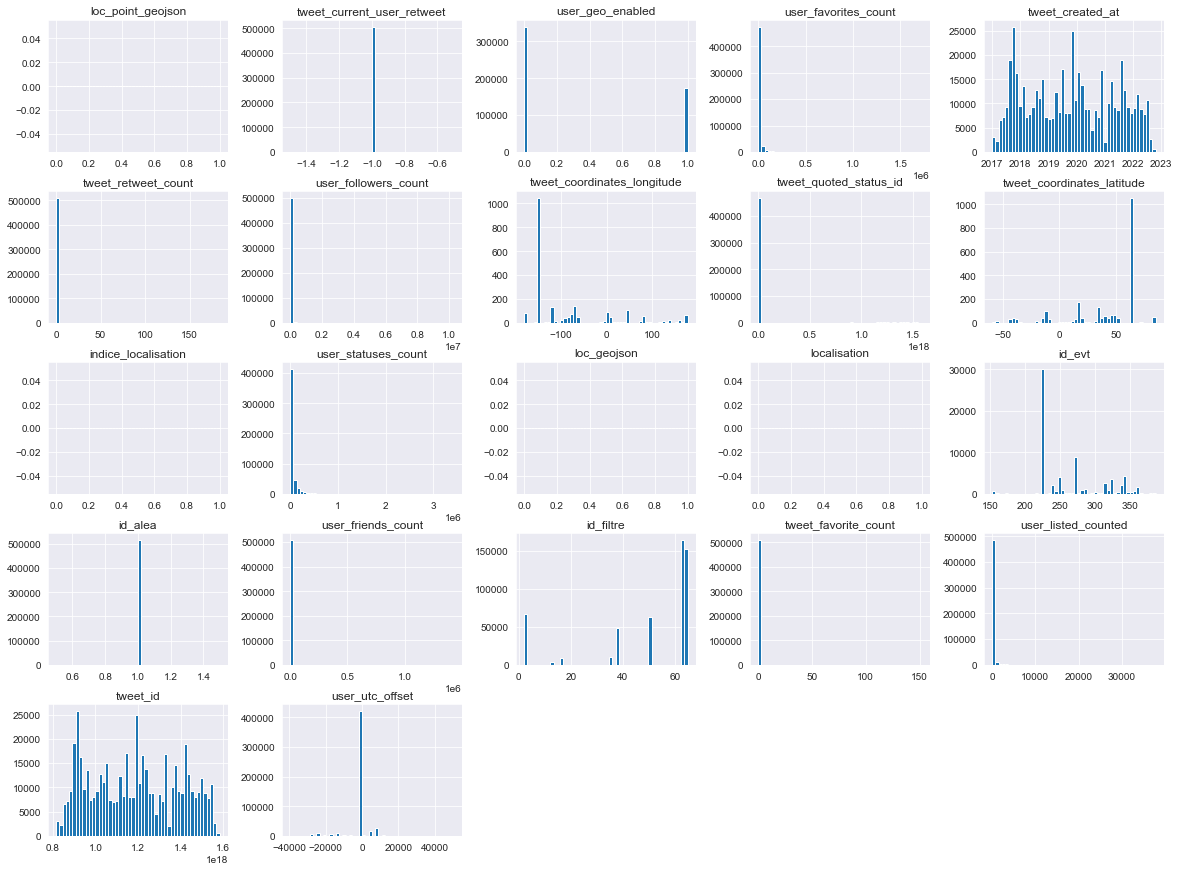

In [73]:
numerical_data.hist(bins=50,figsize=(20,15))
plt.show()


### Remarques 
- On remarque que id_filtre prend des valeurs précises

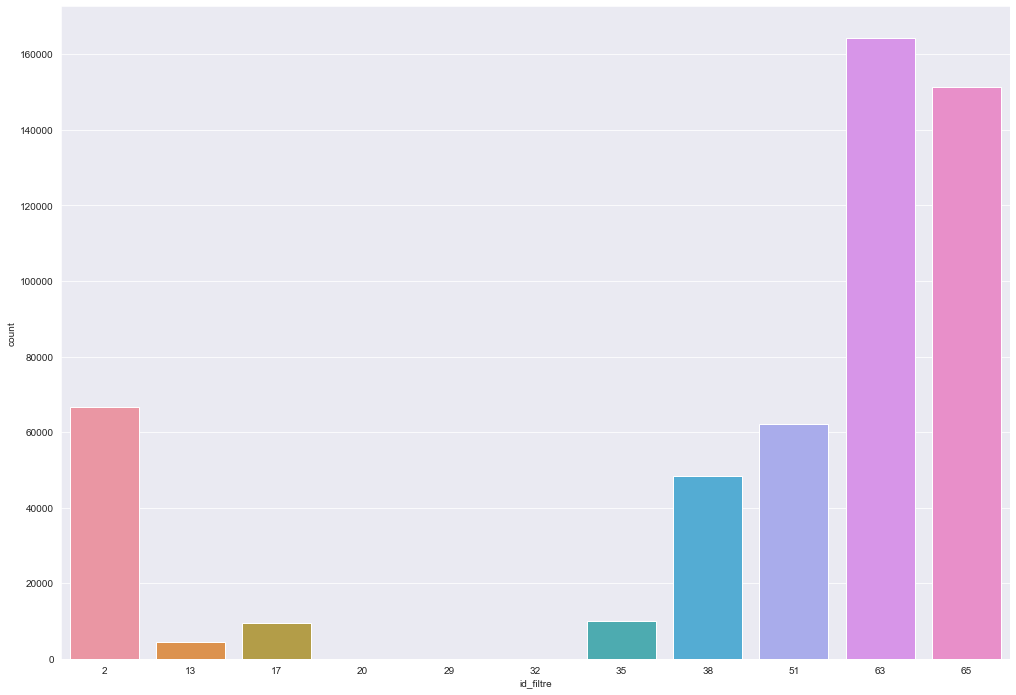

In [74]:
plt.figure(figsize=(17,12))
sns.countplot(data=numerical_data,x='id_filtre')
plt.show()

<Figure size 1224x936 with 0 Axes>

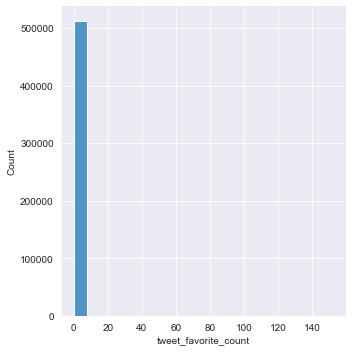

In [77]:
plt.figure(figsize=(17,13))
sns.displot(data=numerical_data,x='tweet_favorite_count')
plt.show()

In [83]:
numerical_data["hour"]=pd.DatetimeIndex(numerical_data['tweet_created_at']).hour
numerical_data["date"]=pd.DatetimeIndex(numerical_data['tweet_created_at']).date
numerical_data['year']=pd.DatetimeIndex(numerical_data['tweet_created_at']).year
numerical_data['day']=pd.DatetimeIndex(numerical_data['tweet_created_at']).day

C:\Users\adminn\AppData\Local\Temp/ipykernel_26236/2839091092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data["hour"]=pd.DatetimeIndex(numerical_data['tweet_created_at']).hour
C:\Users\adminn\AppData\Local\Temp/ipykernel_26236/2839091092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data["date"]=pd.DatetimeIndex(numerical_data['tweet_created_at']).date
C:\Users\adminn\AppData\Local\Temp/ipykernel_26236/2839091092.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [84]:
nom

,loc_point_geojson,doublon,tweet_current_user_retweet,user_geo_enabled,user_favorites_count,tweet_created_at,tweet_retweet_count,user_followers_count,tweet_coordinates_longitude,robot,...,user_friends_count,id_filtre,tweet_favorite_count,user_listed_counted,tweet_id,user_utc_offset,hour,date,year,day
0,NaN,False,-1.0,0.0,37990.0,2019-07-26 12:59:53,0.0,2036.0,NaN,False,...,4997.0,63,0.0,41.0,1154707909470801920,-1.0,12,2019-07-26,2019,26
1,NaN,False,-1.0,0.0,9010.0,2019-07-26 13:03:46,0.0,534.0,NaN,False,...,654.0,63,0.0,0.0,1154708887871922177,-1.0,13,2019-07-26,2019,26
2,NaN,False,-1.0,0.0,889.0,2019-07-26 13:06:10,0.0,137.0,NaN,False,...,321.0,63,0.0,0.0,1154709490442342400,-1.0,13,2019-07-26,2019,26
3,NaN,False,-1.0,1.0,45052.0,2019-07-26 13:13:42,0.0,2423.0,NaN,False,...,2027.0,63,0.0,103.0,1154711387345735680,-1.0,13,2019-07-26,2019,26
4,NaN,False,-1.0,1.0,2845.0,2019-07-26 13:57:45,0.0,3321.0,NaN,False,...,526.0,63,0.0,339.0,1154722470986997761,-1.0,13,2019-07-26,2019,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517296,NaN,False,-1.0,1.0,901.0,2019-07-26 12:49:09,0.0,44018.0,NaN,False,...,1257.0,63,0.0,525.0,1154705207604981762,-1.0,12,2019-07-26,2019,26
517297,NaN,False,-1.0,1.0,1200.0,2019-07-26 12:55:10,0.0,532.0,NaN,False,...,599.0,63,0.0,12.0,1154706722243698688,-1.0,12,2019-07-26,2019,26
517298,NaN,False,-1.0,1.0,1141.0,2019-07-26 12:56:43,0.0,302.0,NaN,False,...,383.0,63,0.0,81.0,1154707110447345664,-1.0,12,2019-07-26,2019,26
517299,NaN,False,-1.0,0.0,10.0,2019-07-26 12:58:07,0.0,140.0,NaN,False,...,0.0,63,0.0,6.0,1154707463553323008,-1.0,12,2019-07-26,2019,26


<a id='3'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">1er approche</h1>

In [95]:
data[['tweet_created_at']]

,tweet_created_at
0,2019-07-26 12:59:53
1,2019-07-26 13:03:46
2,2019-07-26 13:06:10
3,2019-07-26 13:13:42
4,2019-07-26 13:57:45
...,...
517296,2019-07-26 12:49:09
517297,2019-07-26 12:55:10
517298,2019-07-26 12:56:43
517299,2019-07-26 12:58:07


### Definition d'une fenetre 

In [125]:
id_evt_pos=data[data['id_evt']>0]
maxi_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].max().reset_index()
min_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].min().reset_index()
date_mini_maxi_df=min_tweet_date.merge(maxi_tweet_date,how='inner',on='id_evt')
date_mini_maxi_df.rename(columns={'tweet_created_at_x':'debut_tweet','tweet_created_at_y':'fin_tweet'},inplace=True)
date_mini_maxi_df['diff_debut_fin']=date_mini_maxi_df['fin_tweet']-date_mini_maxi_df['debut_tweet']
date_mini_maxi_df['day']=date_mini_maxi_df['diff_debut_fin'].dt.components.days
date_mini_maxi_df['hour']=date_mini_maxi_df['diff_debut_fin'].dt.components.hours
date_mini_maxi_df['minutes']=date_mini_maxi_df['diff_debut_fin'].dt.components.minutes
date_mini_maxi_df['seconds']=date_mini_maxi_df['diff_debut_fin'].dt.components.seconds

date_mini_maxi_df


,id_evt,debut_tweet,fin_tweet,diff_debut_fin,day,hour,minutes,seconds
0,153.0,2017-04-17 07:24:13,2017-04-17 07:44:44,0 days 00:20:31,0,0,20,31
1,154.0,2017-05-25 16:37:10,2017-05-25 17:20:11,0 days 00:43:01,0,0,43,1
2,155.0,2017-09-15 12:59:17,2017-09-15 13:32:10,0 days 00:32:53,0,0,32,53
3,156.0,2017-09-28 03:44:08,2017-09-28 04:19:31,0 days 00:35:23,0,0,35,23
4,157.0,2018-01-02 22:00:32,2018-01-02 22:57:27,0 days 00:56:55,0,0,56,55
...,...,...,...,...,...,...,...,...
158,382.0,2022-07-14 18:30:03,2022-07-14 18:31:25,0 days 00:01:22,0,0,1,22
159,383.0,2022-07-17 02:13:14,2022-07-17 02:24:08,0 days 00:10:54,0,0,10,54
160,384.0,2022-07-22 10:10:22,2022-07-22 10:44:13,0 days 00:33:51,0,0,33,51
161,385.0,2022-07-27 02:59:19,2022-07-27 03:38:13,0 days 00:38:54,0,0,38,54


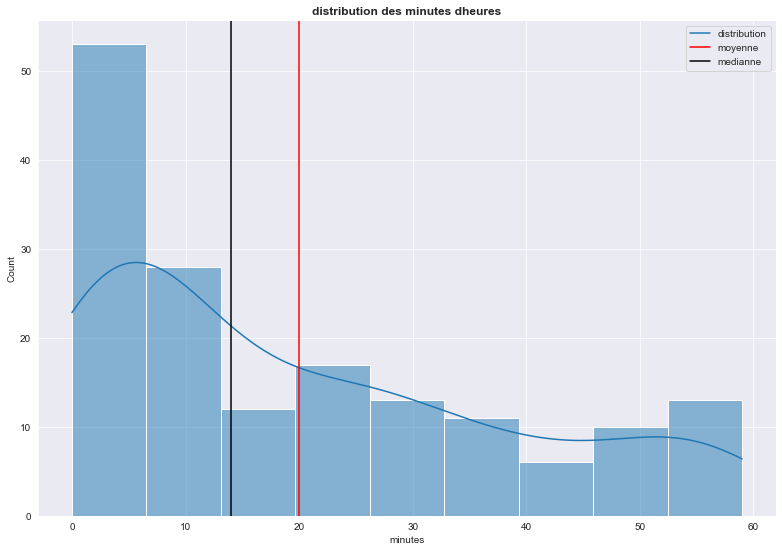

In [167]:
#plt.rcParams["figure.figsize"] = (18,18)
sns.displot(data=date_mini_maxi_df,x='minutes',kde=True)
plt.axvline(date_mini_maxi_df['minutes'].mean(),color='red')
plt.axvline(date_mini_maxi_df['minutes'].median(),color='black')
plt.legend(['distribution','moyenne','medianne'])
plt.title('distribution des minutes d''heures',fontweight='bold')

plt.gcf().set_size_inches(12,8)


plt.show()

###  Remarques : 
- on définera notre fenetre comme la moyenne des minutes : 20 minutes